In [1]:
import pandas as pd


In [24]:
folder1="con_campo_entero/6"
file1=folder1+"/"+"test11_01.csv"
#file1="test11.csv"

bd1=pd.read_csv(file1,sep="\t")
print bd1.head(5)
#bd1[bd1.ion_px_mm>95]
bd=bd1[bd1.iloc[:,1]>50]
print "ion_num1:",bd[bd.ion_number==1].shape[0],"ion_num2:",bd[bd.ion_number==2].shape[0],"ion_num3:",bd[bd.ion_number==3].shape[0]


   ion_time_of_flight  ion_px_mm   ion_py_mm   ion_pz_mm    bx   by   bz  el3  \
0            0.057297   63.157963   -2.869865    9.787945 -0.9 -0.3 -0.6   -1   
1            0.057297   63.157963   -2.869865    9.787945 -0.9 -0.3 -0.6   -1   
2            0.059531   72.875235    5.290201    8.720881 -0.9 -0.3 -0.6   -1   
3            0.059531   72.875235    5.290201    8.720881 -0.9 -0.3 -0.6   -1   
4            0.058741   66.308736   -3.676004    9.514567 -0.9 -0.3 -0.6   -1   

   el4  el5  ion_number  ion_color  
0   -1   -2           1        NaN  
1   -1   -2           1        NaN  
2   -1   -2           2        NaN  
3   -1   -2           2        NaN  
4   -1   -1           1        NaN  
ion_num1: 11852 ion_num2: 11762 ion_num3: 11310


In [26]:
#bd2=bd[(bd.ion_number==3) ]
bd2=bd[(bd.iloc[:,1]>50) ]
bd2.index=range(bd2.shape[0])
print bd2.shape
bd2.head()
bd2_2=bd2[bd2.ion_number==3]
bd2_2.shape

(34924, 12)


(11310, 12)

In [27]:
bd2.head(10)

,ion_time_of_flight,ion_px_mm,ion_py_mm,ion_pz_mm,bx,by,bz,el3,el4,el5,ion_number,ion_color
0,0.057297,63.157963,-2.869865,9.787945,-0.9,-0.3,-0.6,-1,-1,-2,1,NaN
1,0.057297,63.157963,-2.869865,9.787945,-0.9,-0.3,-0.6,-1,-1,-2,1,NaN
2,0.059531,72.875235,5.290201,8.720881,-0.9,-0.3,-0.6,-1,-1,-2,2,NaN
3,0.059531,72.875235,5.290201,8.720881,-0.9,-0.3,-0.6,-1,-1,-2,2,NaN
4,0.058741,66.308736,-3.676004,9.514567,-0.9,-0.3,-0.6,-1,-1,-1,1,NaN
5,0.058741,66.308736,-3.676004,9.514567,-0.9,-0.3,-0.6,-1,-1,-1,1,NaN
6,0.064270,80.150777,1.910972,10.019390,-0.9,-0.3,-0.6,-1,-1,-1,2,NaN
7,0.064270,80.150777,1.910972,10.019390,-0.9,-0.3,-0.6,-1,-1,-1,2,NaN
8,0.060164,69.231594,-4.513289,9.147143,-0.9,-0.3,-0.6,-1,-1,0,1,NaN
9,0.060164,69.231594,-4.513289,9.147143,-0.9,-0.3,-0.6,-1,-1,0,1,NaN


In [15]:
print bd2.shape
print bd2_2.shape

(741686, 12)
(373888, 12)


In [8]:
bd2[bd2.iloc[:,1]<90]

,ion_time_of_flight,ion_px_mm,ion_py_mm,ion_pz_mm,bx,by,bz,el3,el4,el5,ion_number,ion_color


In [28]:
bd2.iloc[bd2[abs(bd2.bx)<0.001].index.values,4]=0
bd2.iloc[bd2[abs(bd2.by)<0.001].index.values,5]=0
bd2.iloc[bd2[abs(bd2.bz)<0.001].index.values,6]=0


In [29]:
gbx,gby,gbz,gel3,gel4,gel5=[],[],[],[],[],[]
i=0
for bx,by,bz,el3,el4,el5 in zip(bd2_2.bx,bd2_2.by,bd2_2.bz,bd2_2.el3,bd2_2.el4,bd2_2.el5):
    #print bx,by,bz,el3,el4,el5
    b=bd2[(bd2.el3==el3)&(bd2.el4==el4)&(bd2.el5==el5)&(bd2.bx==bx)&(bd2.by==by)&(bd2.bz==bz)]
    #if i<10:
    #    print "---"
    #    print b.iloc[:,[1,4,5,6,7,8,9,10,11]]
    #    i=i+1
    #else:
    #    break
        
    if len(list(set(b.ion_color.values)))>2:
        #print len(list(set(b.ion_number.values)))
        #print bx,by,bz,el3,el4,el5
        #print set(b.ion_color.values)
        if abs(by)<0.01:
            by=0
        if abs(by)<0.01:
            by=0
        if abs(bz)<0.01:
            bz=0
        gbx.append(bx)
        gby.append(by)
        gbz.append(bz)
        gel3.append(el3)
        gel4.append(el4)
        gel5.append(el5)
        
datas={"bx":gbx,"by":gby,"bz":gbz,"el3":gel3,"el4":gel4,"el5":gel5}
newbd=pd.DataFrame(datas)
newbd=newbd.drop_duplicates()
newbd.index=range(newbd.shape[0])
newbd
        
    

,bx,by,bz,el3,el4,el5
0,-0.9,-0.3,-0.6,-1,3,2
1,-0.9,-0.3,-0.6,-1,3,3
2,-0.9,-0.3,-0.6,-1,3,4
3,-0.9,-0.3,-0.6,-1,3,5
4,-0.9,-0.3,-0.6,-1,3,6
5,-0.9,-0.3,-0.6,-1,3,7
6,-0.9,-0.3,-0.6,-1,3,8
7,-0.9,-0.3,-0.6,-1,4,3
8,-0.9,-0.3,-0.6,-1,4,4
9,-0.9,-0.3,-0.6,-1,4,5


In [11]:
file1[19:-4]


'test11'

In [23]:
newbd.to_csv("analyzed_test"+file1[19:-4]+"19_01_2016_01.csv",index=False,sep="\t")

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

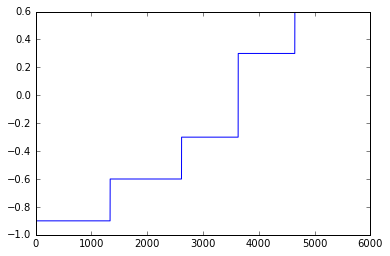

In [20]:
plt.plot(newbd.bx)

In [22]:
newbd[newbd.bx==0.3]

,bx,by,bz,el3,el4,el5
3631,0.3,-0.3,-0.6,2,-3,5
3632,0.3,-0.3,-0.6,2,-3,6
3633,0.3,-0.3,-0.6,2,-3,7
3634,0.3,-0.3,-0.6,2,-3,8
3635,0.3,-0.3,-0.6,2,-2,5
3636,0.3,-0.3,-0.6,2,-2,6
3637,0.3,-0.3,-0.6,2,-2,7
3638,0.3,-0.3,-0.6,2,-2,8
3639,0.3,-0.3,-0.6,2,-1,-2
3640,0.3,-0.3,-0.6,2,-1,-1
